In [4]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
sys.path.append("../") # go to parent dir

In [5]:
data_root_dir = '../data/ODIR-5K_Training_Images/ODIR-5K_Training_Dataset'
img_paths = glob(f'{data_root_dir}/*.jpg')

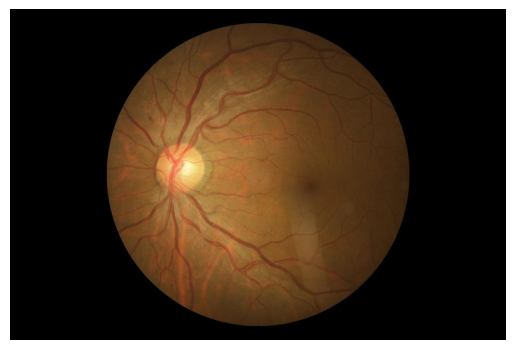

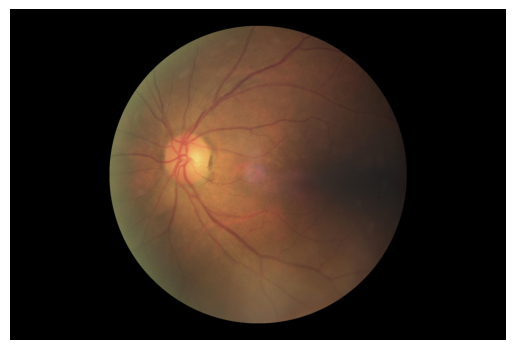

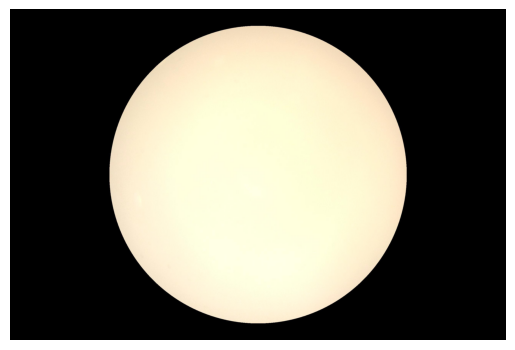

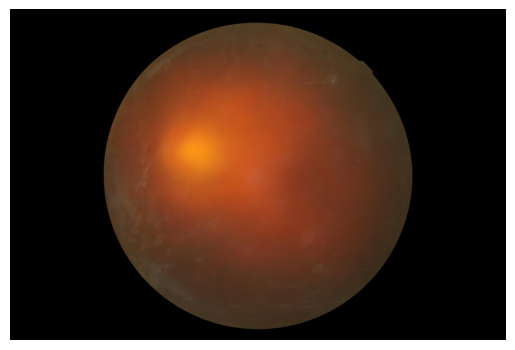

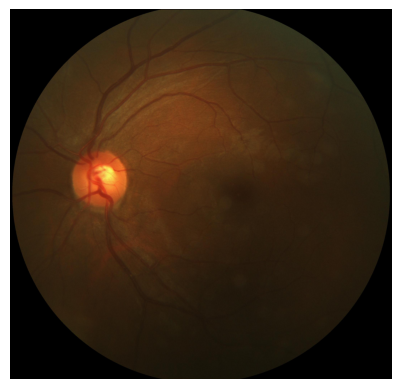

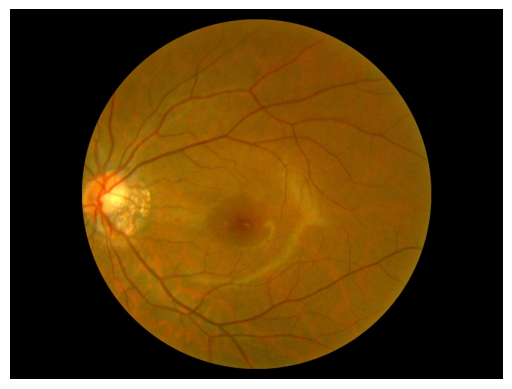

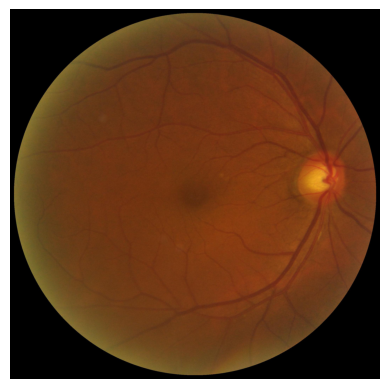

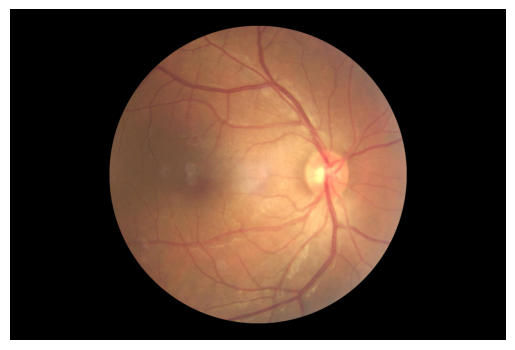

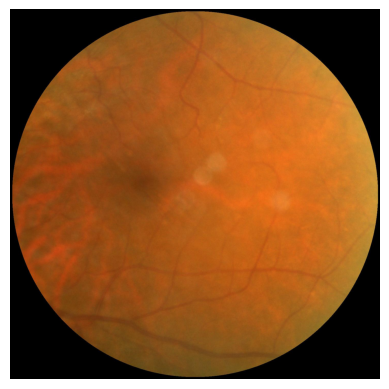

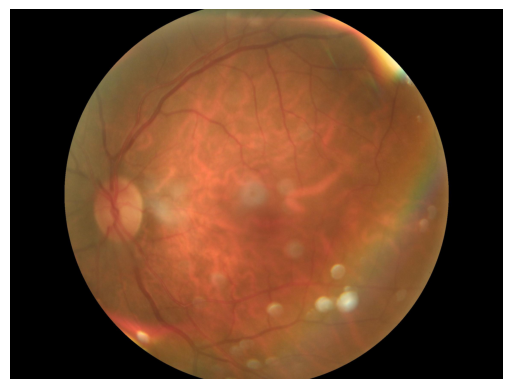

In [6]:
selected_img_paths = random.sample(img_paths, 10)

# Display the selected images
for img_path in selected_img_paths:
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()